# Show sample distribution for Vivian ❤️

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class Pie:
    
    def __init__(self, hotel_name, rating):
        self.file_name = './{0}/{0}_{1}_rating_labeling.csv'.format(hotel_name, rating)
        self.data = pd.read_csv(self.file_name, header=None)
        self.polarity_symbol = {'+': 'positive', '-': 'negative', '0': 'neutral', 'c': 'conflict'}
        self.num_pos, self.num_neu, self.num_neg = 0, 0, 0
        self.polarities = []
        self.get_polarities()
        
    def __call__(self):
        self.sum_polarity()
        self.show_distribution()
        
    def get_polarity(self, aspect_term):
        tmp = aspect_term.split(']')
        polarity = self.polarity_symbol[tmp[1].strip('[')]
        return polarity
        
    def get_polarities(self):
        max_num_polarity = len(self.data.columns)
        polarities = []
        for content_idx in range(len(self.data)):
            for polarity_idx in range(3, max_num_polarity):
                aspect_term = self.data.loc[content_idx, polarity_idx]
                if not pd.isna(aspect_term):
                    try:
                        polarity = self.get_polarity(aspect_term)
                        content = {}
                        content['polarity'] = polarity
                        self.polarities.append(content)
                    except:
                        continue
    
    def sum_polarity(self):
        """
        Summarize polarity
        """
        for polarity in self.polarities:
            if polarity['polarity'] == 'positive':
                self.num_pos += 1
            elif polarity['polarity'] == 'neutral':
                self.num_neu += 1
            elif polarity['polarity'] == 'negative':
                self.num_neg += 1
        print('[Positive: {} Neutral: {} Negative: {}]\n'.
              format(self.num_pos, self.num_neu, self.num_neg))
        
    def show_distribution(self):
        def size(pct, all_vals):
            absolute = int(pct / 100. * np.sum(all_vals))
            return '{:.1f}%\n({:d})'.format(pct, absolute)
        polarities = ['positive', 'neutral', 'negative']
        nums = [self.num_pos, self.num_neu, self.num_neg]
        fig, ax = plt.subplots(figsize=(10, 5), subplot_kw=dict(aspect='equal'))
        explode = (0, 0, 0.1)
        wedges, texts, autotexts = ax.pie(nums, autopct=lambda pct: size(pct, nums),
                                          explode=explode,
                                          textprops=dict(color='w'),
                                          shadow=False, startangle=90)
        ax.legend(wedges, polarities,
                  title='Polarities',
                  loc='upper right',
                  bbox_to_anchor=(1, 0, 0.5, 1))
        plt.setp(autotexts, size=12, weight='bold')
        plt.show()

| No. | Hotel |
| ------ | ------ |
| 1 | Sheraton_Grand_Macao |
| 2 | Ritz_Carlton_Macau-Macau |
| 3 | Banyan_Tree_Macau |
| 4 | JW_Marriott_Hotel_Macau |
| 5 | MGM_Macau-Macau |
| 6 | Venetian_Macao_Resort_Hotel |
| 7 | Conrad_Macao-Macau |
| 8 | Grand_Hyatt_Macau-Macau |
| 9 | St_Regis_Macao-Macau |
| 10 | Wynn_Palace-Macau |

[Positive: 44 Neutral: 582 Negative: 2151]



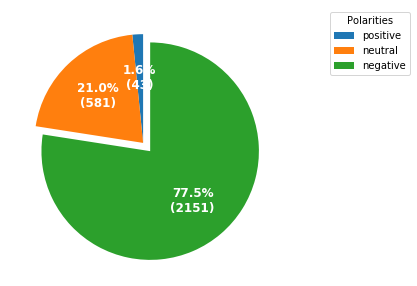

In [74]:
pie = Pie('Sheraton_Grand_Macao', 'low')
pie()

[Positive: 378 Neutral: 8 Negative: 0]



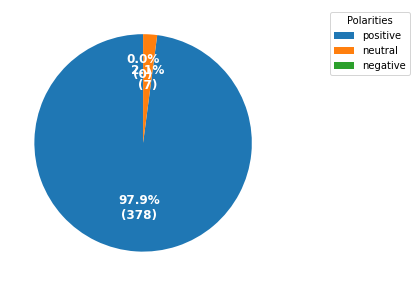

In [4]:
pie = Pie('Banyan_Tree_Macau', 'high')
pie()

[Positive: 39 Neutral: 569 Negative: 1480]



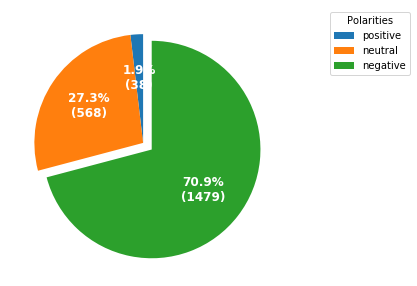

In [6]:
pie = Pie('Sheraton_Grand_Macao', 'low')
pie()